# **Crime Risk in DC**

### Packages

In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read in API data (2019)
API Website: https://opendata.dc.gov/datasets/crime-incidents-in-2019/geoservice

In [2]:
response = requests.get('https://opendata.arcgis.com/datasets/f08294e5286141c293e9202fcd3e8b57_1.geojson')
print('status code:', response.status_code)

# def jprint(obj):
#     # create a formatted string of the Python JSON object
#     text = json.dumps(obj, sort_keys=True, indent=4)
#     print(text)
# jprint(response.json())

status code: 200


### Read in CSV data (2017-2019)

In [49]:
df = pd.read_csv('data/dc-crimes-search-results.csv')
pd.set_option('display.max_columns', 50)

In [5]:
df.head()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,YEAR,offensekey,BID,sector,PSA,ucr-rank,BLOCK_GROUP,VOTING_PRECINCT,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 2,3100.0,property,-77.024256,2017-10-07T16:30:39.000,theft f/auto,evening,140906.0,4.0,1,2017,property|theft f/auto,NaN,4D3,409.0,7,003100 1,precinct 43,397897.0,3650 - 3699 block of georgia avenue nw,2017-10-07T12:30:46.000,17174693,theft f/auto,17174693-01,1A,2017-10-11T01:24:06.000Z,others,"38.936044885337125,-77.024258336912652",38.936037
1,cluster 12,1200.0,property,-77.063918,2017-10-08T20:10:42.000,theft/other,evening,141888.0,2.0,3,2017,property|theft/other,NaN,2D1,203.0,6,001200 4,precinct 33,394459.0,4200 - 4399 block of connecticut avenue nw,2017-10-08T19:47:36.000,17174726,theft/other,17174726-01,3F,2017-10-09T00:10:44.000Z,others,"38.944876069581561,-77.063920231371171",38.944868
2,cluster 26,6900.0,property,-76.989281,2017-10-08T20:29:19.000,theft/other,evening,135140.0,1.0,6,2017,property|theft/other,NaN,1D2,107.0,6,006900 1,precinct 91,400930.0,1200 - 1299 block of d street se,2017-10-08T19:59:26.000,17174738,theft/other,17174738-01,6B,2017-10-10T02:02:49.000Z,others,"38.884104802510656,-76.989283449464125",38.884097
3,cluster 39,10900.0,property,-77.001750,2017-10-08T23:42:14.000,theft/other,midnight,128205.0,7.0,8,2017,property|theft/other,NaN,7D3,708.0,6,010900 2,precinct 125,399848.0,4600 - 4799 block of south capitol street,2017-10-08T23:04:37.000,17174818,theft/other,17174818-01,8D,2017-10-09T03:42:16.000Z,others,"38.821631799016011,-77.001752641497887",38.821624
4,cluster 33,7808.0,property,-76.927013,2017-10-08T21:50:07.000,theft f/auto,midnight,135883.0,6.0,7,2017,property|theft f/auto,NaN,6D1,608.0,7,007808 1,precinct 96,406332.0,5200 - 5299 block of ames street ne,2017-10-08T21:45:00.000,17174836,theft f/auto,17174836-01,7C,2017-10-09T04:12:16.000Z,others,"38.890775720497125,-76.927015181332635",38.890768


### Clean CSV Data

In [50]:
columns_remove = ['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'offense-text', 'YBLOCK', 'DISTRICT', 'offensekey', 'sector', 
                  'PSA', 'ucr-rank', 'BLOCK_GROUP', 'VOTING_PRECINCT', 'XBLOCK', 'OCTO_RECORD_ID', 'ANC', 'location']

df = df.drop(columns_remove, axis=1)

df = df[['CCN', 'START_DATE', 'END_DATE', 'REPORT_DAT', 'YEAR', 'SHIFT', 'WARD', 'BID', 'BLOCK', 'offensegroup', 'OFFENSE', 
         'METHOD', 'LATITUDE', 'LONGITUDE']]

In [13]:
df.head()

,CCN,START_DATE,END_DATE,REPORT_DAT,YEAR,SHIFT,WARD,BID,BLOCK,offensegroup,OFFENSE,METHOD,LATITUDE,LONGITUDE
0,17174693,2017-10-07T12:30:46.000,2017-10-07T16:30:39.000,2017-10-11T01:24:06.000Z,2017,evening,1,NaN,3650 - 3699 block of georgia avenue nw,property,theft f/auto,others,38.936037,-77.024256
1,17174726,2017-10-08T19:47:36.000,2017-10-08T20:10:42.000,2017-10-09T00:10:44.000Z,2017,evening,3,NaN,4200 - 4399 block of connecticut avenue nw,property,theft/other,others,38.944868,-77.063918
2,17174738,2017-10-08T19:59:26.000,2017-10-08T20:29:19.000,2017-10-10T02:02:49.000Z,2017,evening,6,NaN,1200 - 1299 block of d street se,property,theft/other,others,38.884097,-76.989281
3,17174818,2017-10-08T23:04:37.000,2017-10-08T23:42:14.000,2017-10-09T03:42:16.000Z,2017,midnight,8,NaN,4600 - 4799 block of south capitol street,property,theft/other,others,38.821624,-77.001750
4,17174836,2017-10-08T21:45:00.000,2017-10-08T21:50:07.000,2017-10-09T04:12:16.000Z,2017,midnight,7,NaN,5200 - 5299 block of ames street ne,property,theft f/auto,others,38.890768,-76.927013


In [74]:
# Number of crimes by year

year_df = pd.DataFrame(df.YEAR.value_counts())
year_df = year_df.rename(columns={"YEAR": "Year"})
year_df

,Year
2018,33783
2019,24936
2017,7902


Text(-123.07499999999999, 0.5, 'Offense Type')

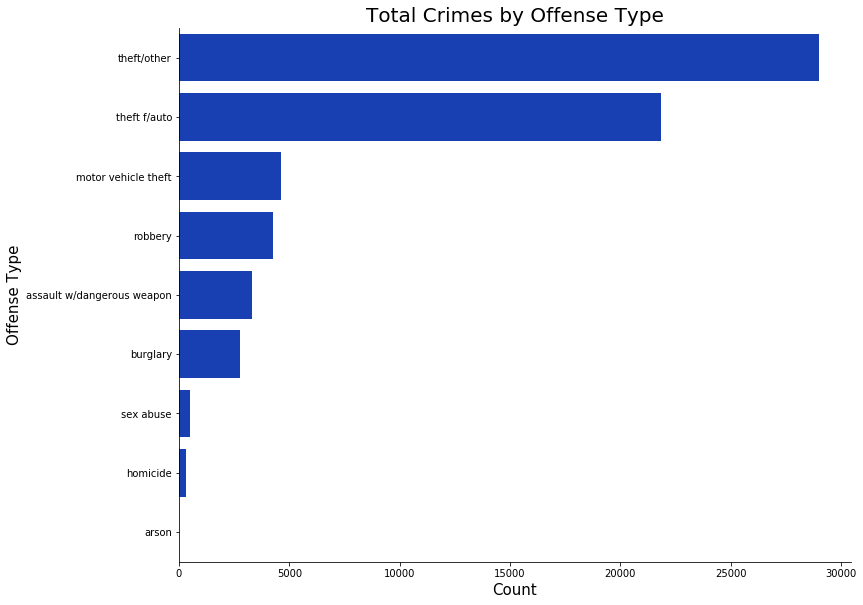

In [60]:
# Categorical plot for count of offense type

color = ['#0033cc']
sns.catplot(y='OFFENSE', kind='count', height=8, aspect=1.5, order=df.OFFENSE.value_counts().index, 
            data=df, palette=sns.color_palette(color))

plt.title('Total Crimes by Offense Type', fontsize=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Offense Type', fontsize=15)

In [71]:
# Type of weapon used in attack

method_df = pd.DataFrame(df.METHOD.value_counts())
method_df = method_df.rename(columns={"METHOD": "Weapon Used"})
method_df

,Weapon Used
others,61927
gun,3223
knife,1471


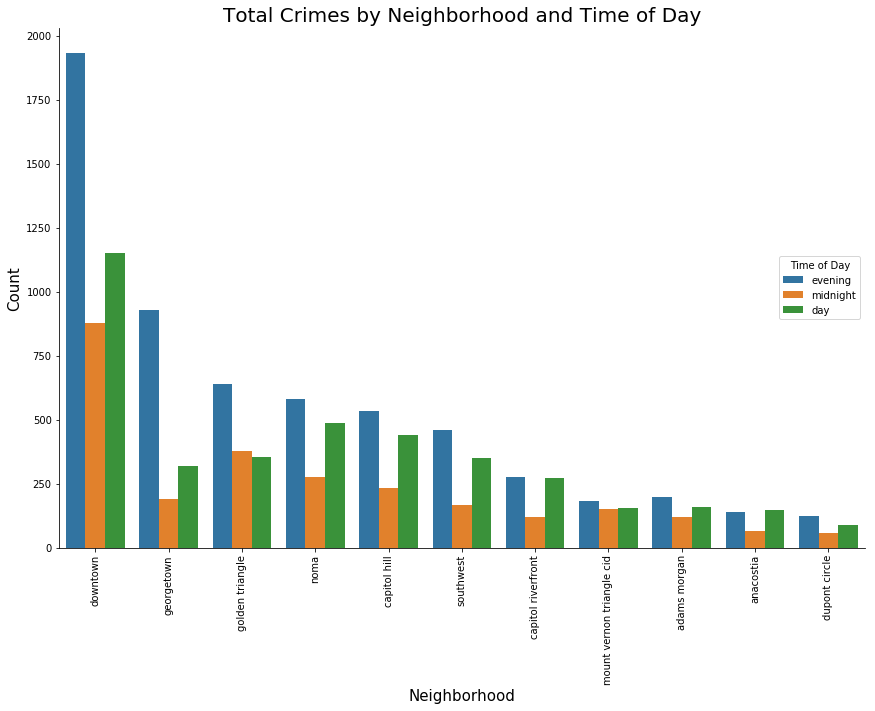

In [58]:
# Categorical plot for count of total crimes by neighborhood and time of day

sns.catplot(x='BID', hue='SHIFT', kind='count', height=8, aspect=1.5, order=df.BID.value_counts().index, 
            data=df, legend=False)

plt.title('Total Crimes by Neighborhood and Time of Day', fontsize=20)

plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.xlabel('Neighborhood', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Time of Day', loc='right')

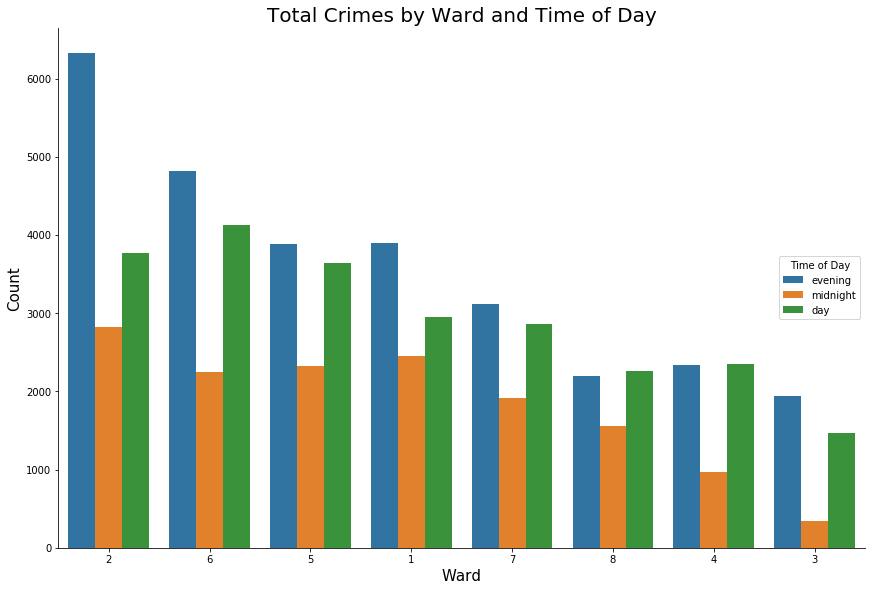

In [77]:
# Categorical plot for count of total crimes by ward and time of day

sns.catplot(x='WARD', hue='SHIFT', kind='count', height=8, aspect=1.5, order=df.WARD.value_counts().index, 
            data=df, legend=False)

plt.title('Total Crimes by Ward and Time of Day', fontsize=20)

plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Ward', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Time of Day', loc='right')

In [87]:
# Map of crimes by ward

In [86]:
%%HTML 

<div class='tableauPlaceholder' id='viz1570313986891' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;dc&#47;dc_crimes_map&#47;DCCrimesbyWard2017-2019&#47;1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
        <param name='embed_code_version' value='3' /> 
        <param name='site_root' value='' />
        <param name='name' value='dc_crimes_map&#47;DCCrimesbyWard2017-2019' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;dc&#47;dc_crimes_map&#47;DCCrimesbyWard2017-2019&#47;1.png' /> 
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='filter' value='publish=yes' />
    </object>              
    <script type='text/javascript'>                    
        var divElement = document.getElementById('viz1570313986891');                    
        var vizElement = divElement.getElementsByTagName('object')[0];                    
        vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
        var scriptElement = document.createElement('script');                    
        scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
        vizElement.parentNode.insertBefore(scriptElement, vizElement);                
    </script>
</div>  